<a href="https://colab.research.google.com/github/yunahjohnson/yunajohnson/blob/main/Copy_of_FDS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# read the data
df = pd.read_csv("/content/drive/MyDrive/MIT Applied Data Science- Case Study/foodhub_order.csv")
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

In [ ]:
df.shape

(1898, 9)

#### Observations: The DataFrame has 1898 rows and 9 columns.


In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


Observations:
The DataFrame has different data types: int, object, float. There is not no-null data for all the 9 columns.

In [ ]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
There are not missing values for rows and columns.

In [ ]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
The min of the food prep time is 4.632481 min and the max is 35min.
The average time of the food prep is 27.371970 min.

In [ ]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
736 ratings are not given.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

<Axes: xlabel='cost_of_the_order', ylabel='Count'>

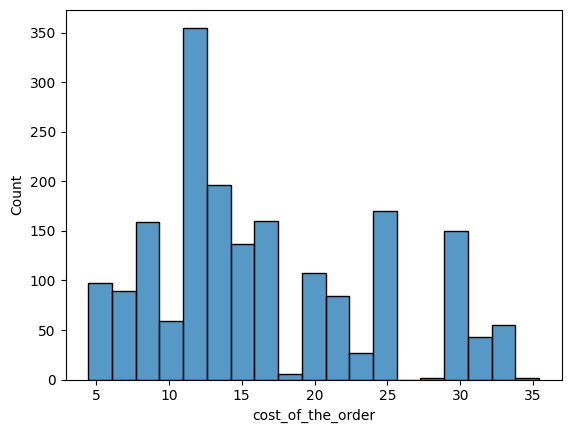

In [ ]:
sns.histplot(data=df,x='cost_of_the_order')

<Axes: xlabel='cost_of_the_order'>

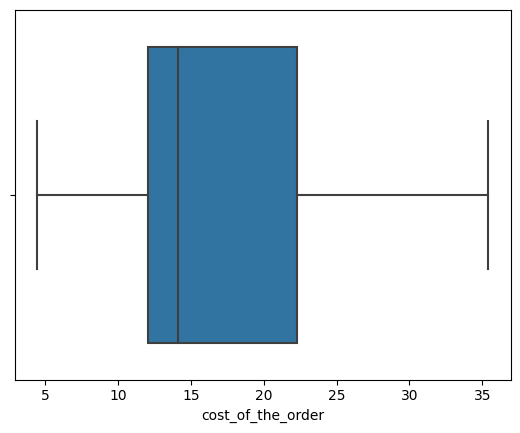

In [ ]:
sns.boxplot(data=df,x="cost_of_the_order")

<Axes: xlabel='cuisine_type', ylabel='count'>

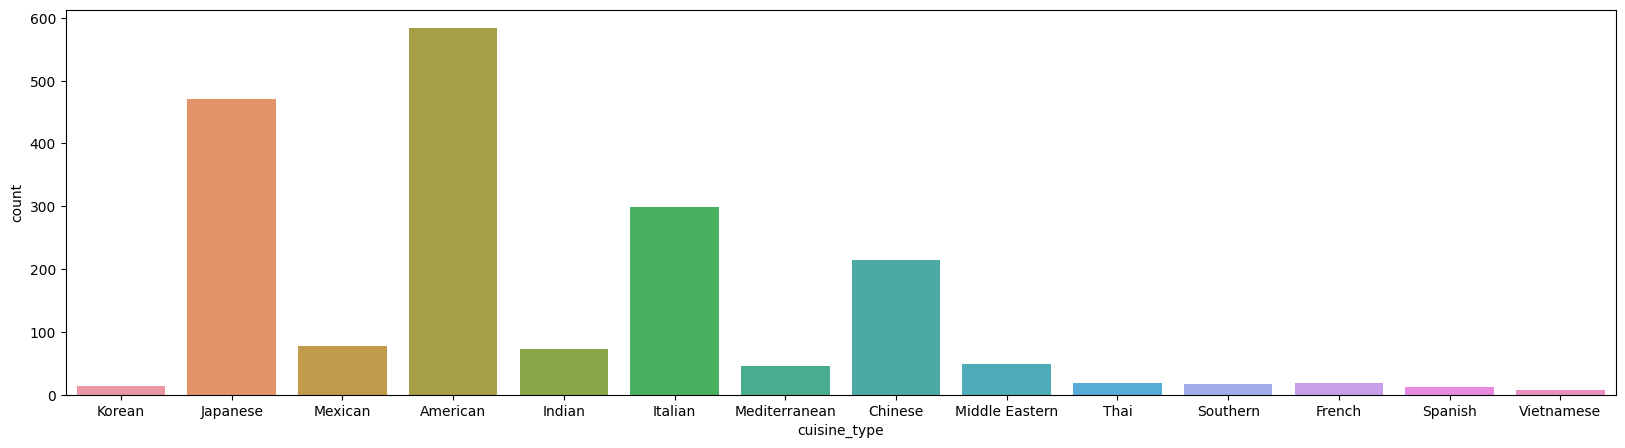

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(data=df,x="cuisine_type")

<Axes: xlabel='day_of_the_week', ylabel='count'>

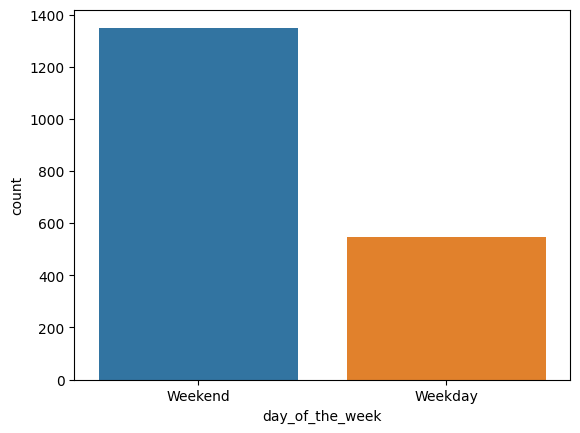

In [ ]:
sns.countplot(data=df,x="day_of_the_week")

<Axes: xlabel='rating', ylabel='count'>

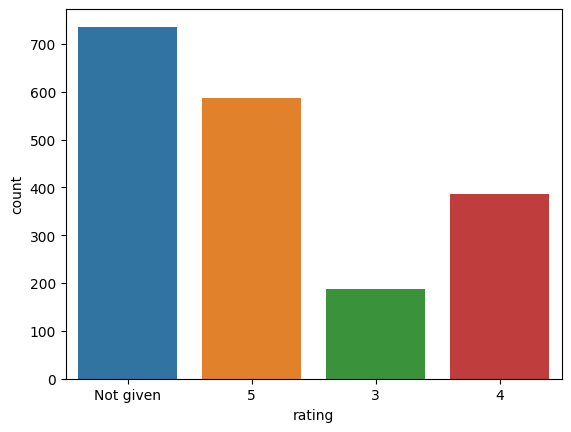

In [ ]:
sns.countplot(data=df,x="rating")

<Axes: xlabel='food_preparation_time', ylabel='Count'>

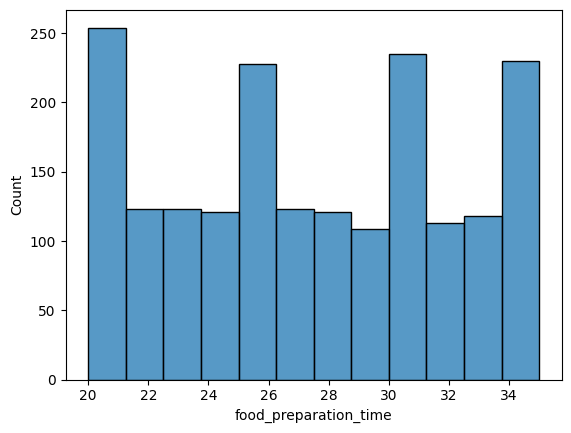

In [ ]:
sns.histplot(data=df,x="food_preparation_time")

<Axes: xlabel='food_preparation_time'>

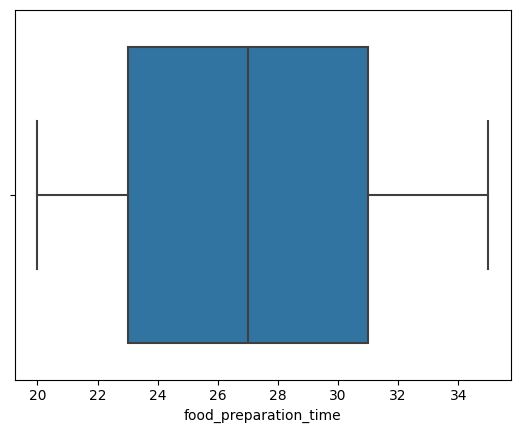

In [ ]:
sns.boxplot(data=df,x="food_preparation_time")

<Axes: xlabel='delivery_time', ylabel='Count'>

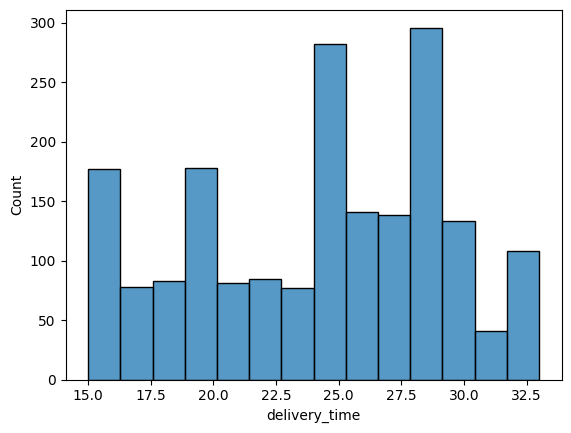

In [ ]:
sns.histplot(data=df,x="delivery_time")

<Axes: xlabel='delivery_time'>

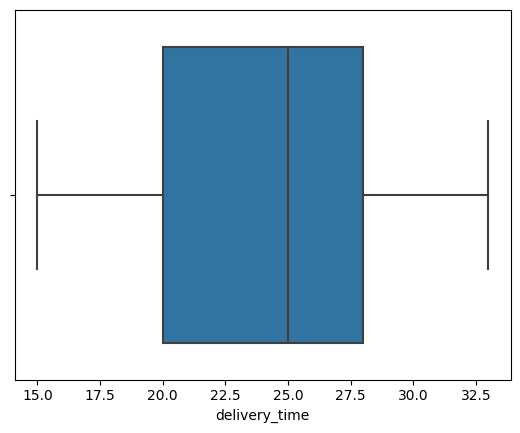

In [ ]:
sns.boxplot(data=df,x="delivery_time")

In [ ]:
df["restaurant_name"].value_counts().head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
Shake shack has the largest number of the orders received.

In [ ]:
df_weekend = df[df["day_of_the_week"] == "Weekend"]
df_weekend["cuisine_type"].value_counts().nunique

<bound method IndexOpsMixin.nunique of American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64>

#### Observations:
American cusine type is the most popular one on weekends.

In [ ]:
df_greater_than20 = df[df["cost_of_the_order"]>20]
df_greater_than20.shape[0]

555

In [ ]:
percentage = (df_greater_than20.shape[0]/df.shape[0]) * 100
print(round(percentage,3),"%")

29.241 %


#### Observations:
The number of total order cost that are greater than 20 is 555.
The percentage of it is 29.241%.


In [ ]:
df["delivery_time"].mean()

24.161749209694417

#### Observations:
The mean devliery time is 24.16 min.

In [ ]:
df["customer_id"].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
The top 3 IDs are: 52832,47440,83287

### Multivariate Analysis

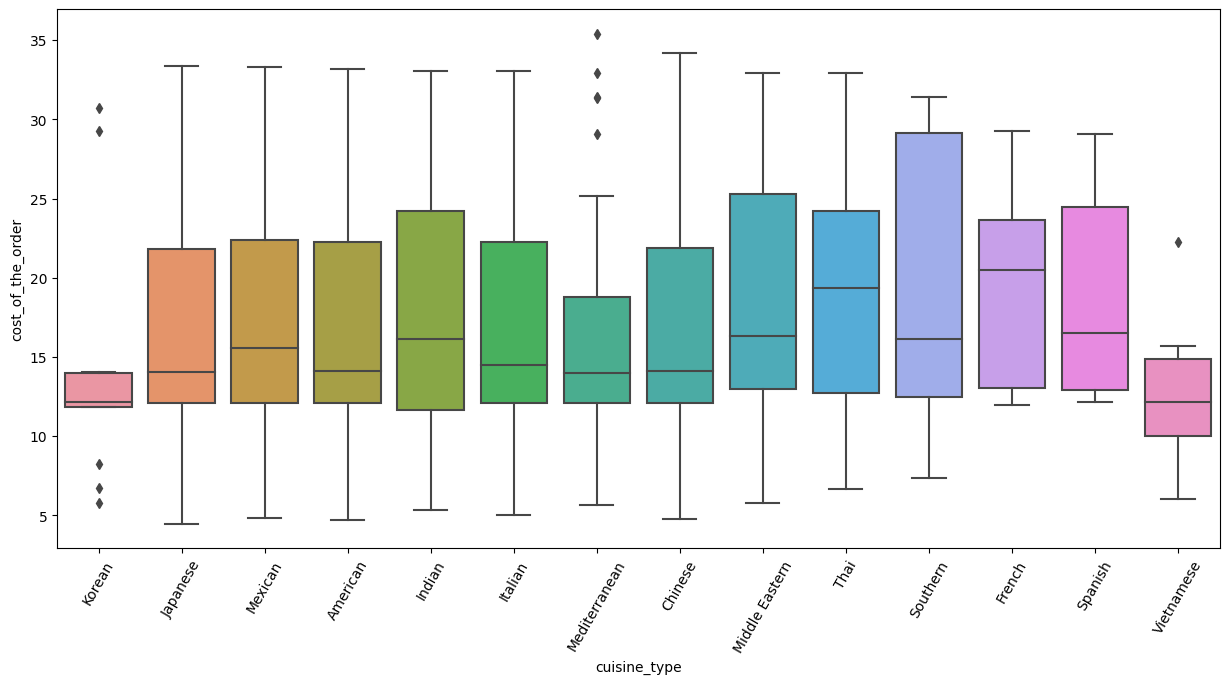

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df)
plt.xticks(rotation = 60)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

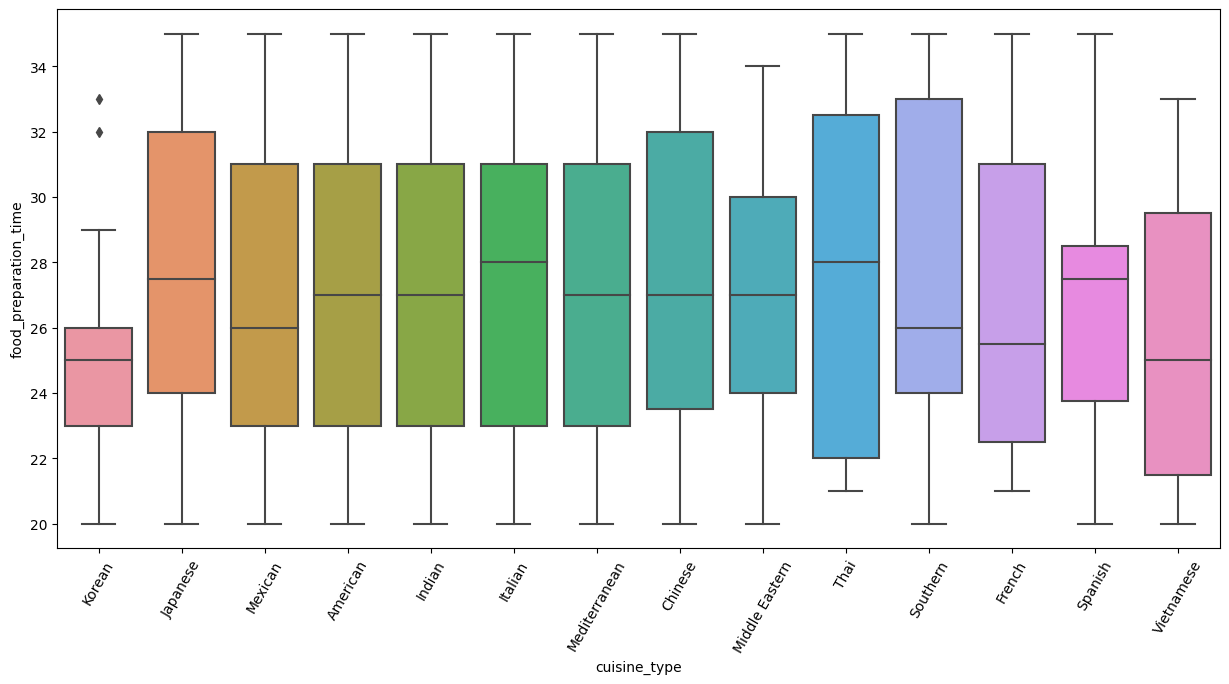

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(x="cuisine_type", y="food_preparation_time",data=df)
plt.xticks(rotation = 60)


<Axes: xlabel='day_of_the_week', ylabel='delivery_time'>

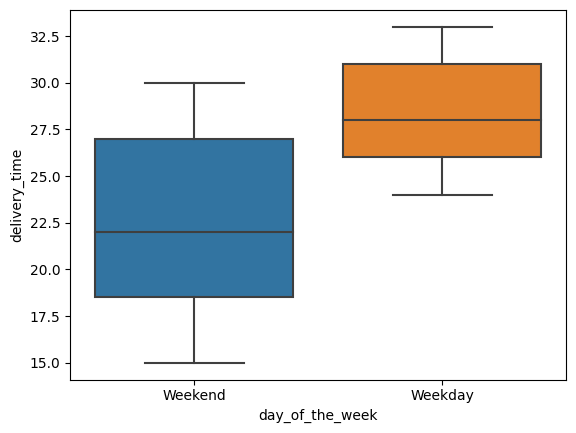

In [ ]:

sns.boxplot(x= "day_of_the_week", y= "delivery_time", data= df)


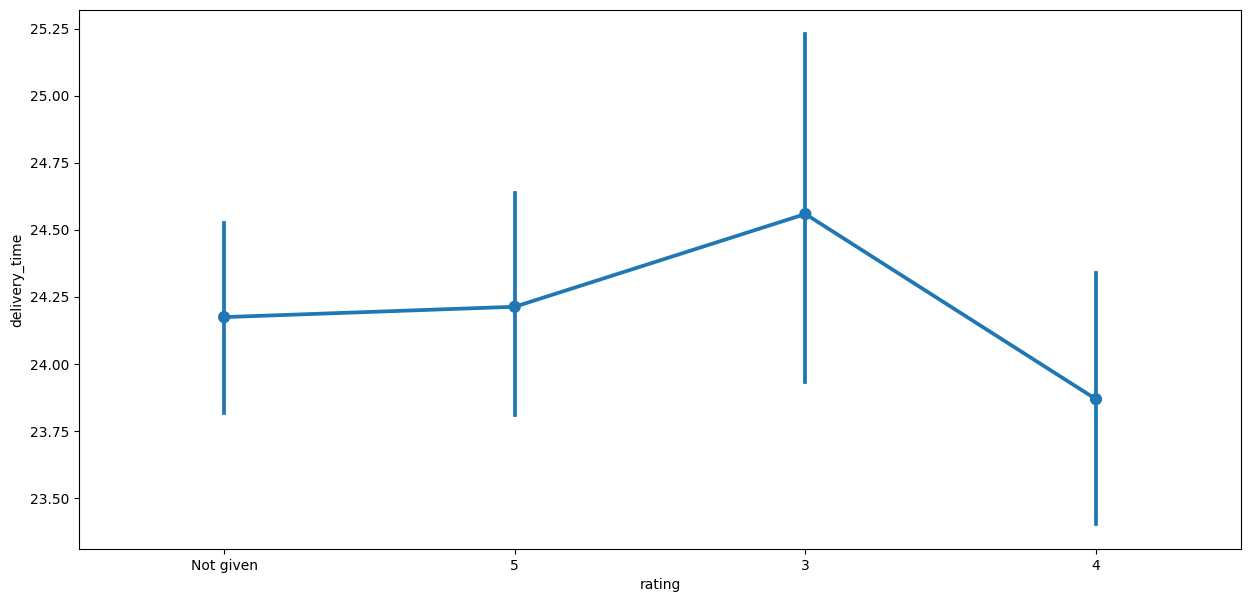

In [ ]:
plt.figure(figsize = (15,7))
sns.pointplot(x = "rating", y= "delivery_time",data =df)
plt.show()

<Axes: xlabel='rating', ylabel='food_preparation_time'>

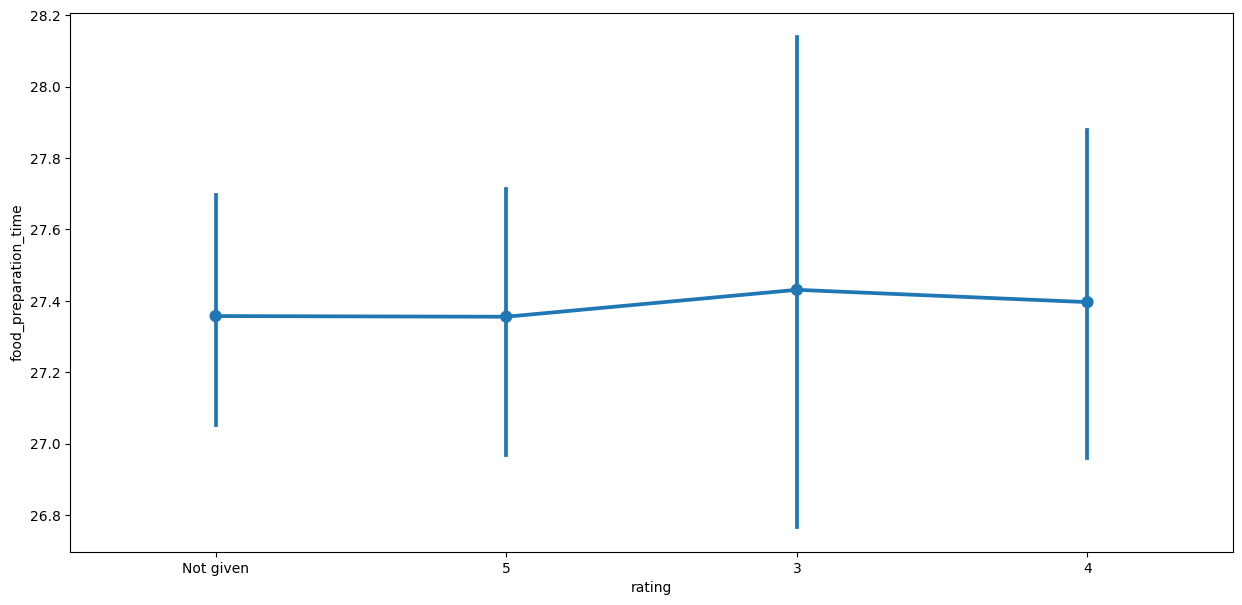

In [ ]:
plt.figure(figsize = (15,7))
sns.pointplot(x = "rating", y = "food_preparation_time", data= df)

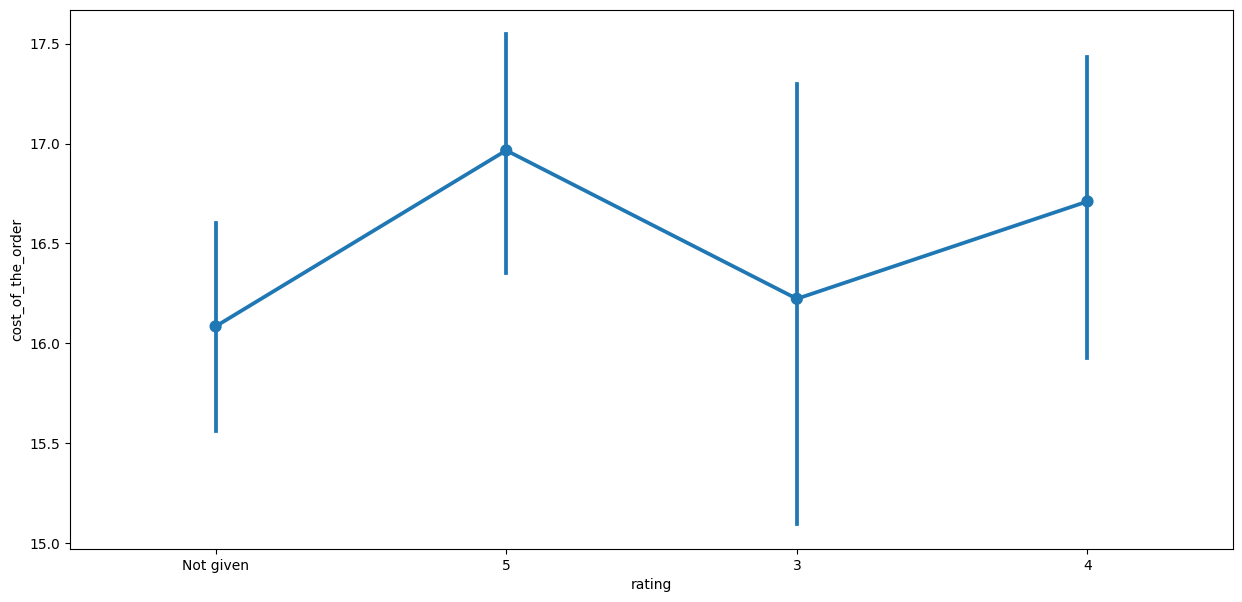

In [ ]:
plt.figure(figsize=(15, 7))
sns.pointplot(x="rating", y="cost_of_the_order", data=df)   # Complete the code to visualize the relationship between rating and cost of the order using pointplot
plt.show()

<Axes: >

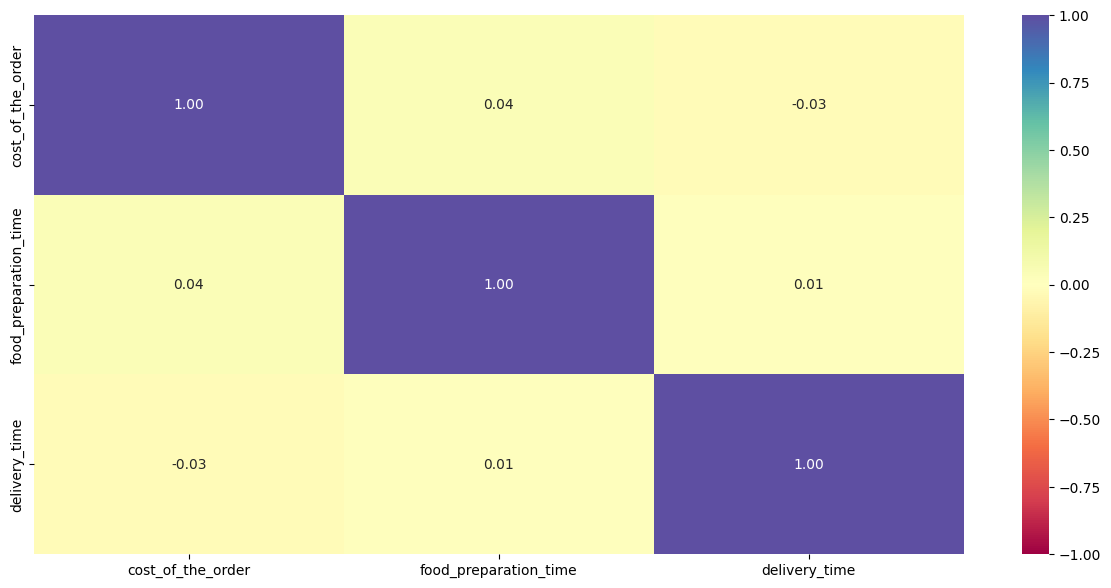

In [ ]:
col_list = ['cost_of_the_order','food_preparation_time','delivery_time']
plt.figure(figsize=(15,7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1,vmax=1,fmt =".2f", cmap ="Spectral" )

In [ ]:
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()
filtered_df = df[(df['rating'] > 50) & (df[df_mean_4] > 4)]


NameError: ignored

#### Observations:


In [ ]:
def compute_rev(x):
    if x >20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0
df['Revenue'] = df['cost_of_the_order'].apply(compute_rev)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [ ]:
total_rev = df['Revenue'].sum()
print(total_rev)

6166.303


#### Observations:
total revenue is 6166,303.

In [ ]:
df['total_time'] = df['food_preparation_time'] + df['delivery_time']



df_greater_than60 = df[df['total_time']>60]
df_greater_than60.shape[0]

200

In [ ]:
percentage= (df_greater_than60.shape[0]/df.shape[0]) * 100
print(round(percentage,3),"%")

10.537 %


#### Observations:
There are 200 counts that have total_time(food prep time + delivery) taken more than 60 min. And its percentage is 10.537%.

In [ ]:
df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()

28.340036563071298

In [ ]:
df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()

22.4700222057735

#### Observations:
The mean delivery time for weekdays is 28.34 min while 22.47 min for the weekend.

### Conclusion and Recommendations

### Conclusions:
*  There are not significant correlation between food-prep-time and ratings or delivery_time and ratings.
* Most people order foods which costs range betwen 10 and 15.
* People order fast American foods more for weekdays and Japanese, Italian cuisines more for weekends because of food-prep time.

### Recommendations:

*  The more pricey sales bring the more revenue. Therefore, we could promote coupons for high-priced meals throughout a week.

* Many restaurants have big range(max-min) of food-prep-time. Hence, they could promote the food that requires short period of prep time for weekdays.



---